In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [9]:
data = pd.read_csv('TelcoChurn/Telco-Customer-Churn.csv')

data.head()
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Preprocessing

In [10]:
data = data.drop(["customerID", "gender", "PaperlessBilling", "PaymentMethod", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"],axis=1)
data.head()


,SeniorCitizen,Partner,Dependents,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,Month-to-month,29.85,29.85,No
1,0,No,No,34,One year,56.95,1889.5,No
2,0,No,No,2,Month-to-month,53.85,108.15,Yes
3,0,No,No,45,One year,42.30,1840.75,No
4,0,No,No,2,Month-to-month,70.70,151.65,Yes


In [11]:
data.nunique()

SeniorCitizen        2
Partner              2
Dependents           2
tenure              73
Contract             3
MonthlyCharges    1585
TotalCharges      6531
Churn                2
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   Partner         7043 non-null   object 
 2   Dependents      7043 non-null   object 
 3   tenure          7043 non-null   int64  
 4   Contract        7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7043 non-null   object 
 7   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 440.3+ KB


In [15]:
data = data[data['TotalCharges'].str.strip() != '']

In [16]:
# Mengubah kolom TotalCharges menjadi tipe numerik
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [17]:
# Menghapus baris yang tidak valid (jika ada)
data = data.dropna(subset=['TotalCharges'])


In [20]:
#data.info()
data.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,Month-to-month,29.85,29.85,No
1,0,No,No,34,One year,56.95,1889.50,No
2,0,No,No,2,Month-to-month,53.85,108.15,Yes
3,0,No,No,45,One year,42.30,1840.75,No
4,0,No,No,2,Month-to-month,70.70,151.65,Yes


In [13]:
x = data.drop(['Churn'],axis=1)
y = data['Churn']

In [22]:
y = OrdinalEncoder().fit_transform(y.values.reshape(-1,1)).ravel()
x = OrdinalEncoder().fit_transform(x)
x = StandardScaler().fit_transform(x)

# Split Data

In [23]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

# Train Data

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005),input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.l2(0.005),activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6396 - loss: 1.2079 - val_accuracy: 0.7764 - val_loss: 0.7924
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7558 - loss: 0.7684 - val_accuracy: 0.7864 - val_loss: 0.6188
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7563 - loss: 0.6224 - val_accuracy: 0.7871 - val_loss: 0.5448
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.7597 - loss: 0.5813 - val_accuracy: 0.7842 - val_loss: 0.5073
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7703 - loss: 0.5275 - val_accuracy: 0.7906 - val_loss: 0.4898
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.7730 - loss: 0.4953 - val_accuracy: 0.7970 - val_loss: 0.4718
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.7878 - loss: 0.4803 - val_accuracy: 0.7913 - val_loss: 0.4632
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.7707 - loss: 0.4

In [56]:
prediction = model.predict(x_test[:5])
prediction_label = [1 if p >= 0.5 else 0 for p in prediction]
print(f'Prediction label : {prediction_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction label : [0, 0, 0, 0, 0]


In [57]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f'accuracy : {accuracy}')
print(f'loss : {loss}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8059 - loss: 0.4245
accuracy : 0.802696943283081
loss : 0.43738889694213867


# plot

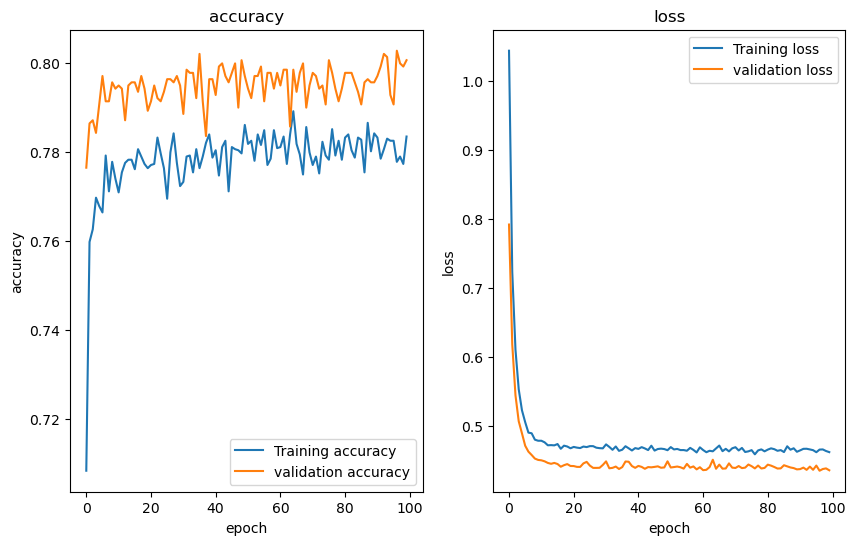

In [58]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()